In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from pathlib import Path
import math

import itertools
from functools import partial

DATA_DIR = Path("/content/drive/My Drive/SH/data")

tf.keras.backend.clear_session()
tf.__version__

'2.2.0-rc2'

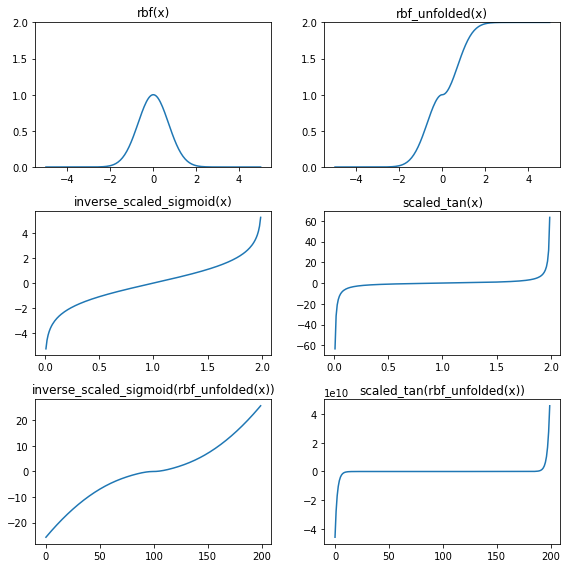

In [0]:
# Radial basis activation function: e^(-x^2)
@tf.function
def rbf(x):
    return tf.exp(-tf.pow(x, 2))

@tf.function
def rbf_unfolded(x):
    activation = tf.exp(-tf.pow(x, 2))
    return tf.where(x < 0, activation, 2 - activation)

@tf.function
def inverse_scaled_sigmoid(x):
    return -tf.math.log(1/(.5*x) - 1)

@tf.function
def scaled_tan(x):
    return tf.tan(math.pi * (x+1) / 2)


x = tf.linspace(-5., 5, 200)
x = tf.cast(x, tf.float64)

x_ = tf.linspace(0., 2., 200)
x_ = tf.cast(x_, tf.float64)

plt.figure(figsize=(8, 8))

plt.subplot(321)
plt.plot(x, rbf(x))
plt.ylim(0, 2)
plt.title("rbf(x)")

plt.subplot(322)
plt.plot(x, rbf_unfolded(x))
plt.ylim(0, 2)
plt.title("rbf_unfolded(x)")

plt.subplot(323)
plt.plot(x_[1:-1], inverse_scaled_sigmoid(x_)[1:-1])
plt.title("inverse_scaled_sigmoid(x)")

plt.subplot(324)
plt.plot(x_[1:-1], scaled_tan(x_)[1:-1])
plt.title("scaled_tan(x)")

plt.subplot(325)
plt.plot(inverse_scaled_sigmoid(rbf_unfolded(x)))
plt.title("inverse_scaled_sigmoid(rbf_unfolded(x))")

plt.subplot(326)
plt.plot(scaled_tan(rbf_unfolded(x)))
plt.title("scaled_tan(rbf_unfolded(x))")


plt.tight_layout()

In [0]:
w = tf.constant([-1., 1])
X = tf.constant([
    (0., 0),
    (2, 2),
    (2, 0),
    (0, 2)
])

w = tf.expand_dims(w, axis=0)

excitations = tf.squeeze(w @ tf.expand_dims(X, axis=-1))
unfolded_activations = rbf_unfolded(excitations)
y = unfolded_activations / 2
y

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5       , 0.5       , 0.00915782, 0.99084216], dtype=float32)>

In [0]:
# Test with sigmoid
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,
                                                          use_bias=False,
                                                          activation="sigmoid",
                                                          input_shape=(2,))])

model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

model.set_weights([np.array([[-1.], [1.]])])
y = model.predict(X)

model.set_weights([np.array([[1.], [-1.]])])
model.fit(X, y, epochs=10000, verbose=0)

print("Target:")
print(y)
print("Actual:")
print(model.predict(X))
print("Weights:")
print(tf.squeeze(model.get_weights()[0]))

Target:
[[0.5       ]
 [0.5       ]
 [0.11920292]
 [0.880797  ]]
Actual:
[[0.5       ]
 [0.49999994]
 [0.12755482]
 [0.87244517]]
Weights:
tf.Tensor([-0.9613768   0.96137667], shape=(2,), dtype=float32)


In [0]:
# Test with rbf unfolded
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,
                                                          use_bias=False,
                                                          activation=rbf_unfolded,
                                                          input_shape=(2,))])

model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

model.set_weights([np.array([[-1.], [1.]])])
y = model.predict(X)

model.set_weights([np.array([[1.], [-1.]])])
model.fit(X, y, epochs=10000, verbose=0)

print("Target:")
print(y)
print("Actual:")
print(model.predict(X))
print("Weights:")
print(tf.squeeze(model.get_weights()[0]))

Target:
[[1.        ]
 [1.        ]
 [0.01831564]
 [1.9816843 ]]
Actual:
[[1.]
 [1.]
 [1.]
 [1.]]
Weights:
tf.Tensor([ 0. -0.], shape=(2,), dtype=float32)


In [0]:
y

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5       , 0.5       , 0.00915782, 0.99084216], dtype=float32)>